# Algorithm Comparison

This notebook compares the results of three algorithms (NSGA2, NSGA3, UNSGA3), and two python libraries (DEAP, PYMOO) after 128 generations.

In [52]:
from osier import *
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

mpl.use("pgf")
plt.rcParams['pgf.texsystem'] = 'pdflatex'
plt.rcParams['text.usetex'] = True
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['figure.edgecolor'] = 'k'
plt.rcParams['figure.facecolor'] = 'lightgray'
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.family'] = "serif"
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['legend.shadow'] = True

plt.rcParams['text.latex.preamble'] = r'\newcommand{\mathdefault}[1][]{}'

In [2]:
# nsga3_path = "../../deap_data/20230421-085754-OsierModel.pkl"
# nsga2_path = "../../deap_data/20230426-172831-OsierModel.pkl"

nsga3_path = "../../osier_data/20230421-085754-OsierModel.pkl"
nsga2_path = "../../osier_data/20230426-172831-OsierModel.pkl"

In [3]:
dummy_problem = CapacityExpansion(technology_list=[1], demand=np.arange(1,10,1), objectives=[])

## NSGA2

with open("../../osier_data/2023-04-26-nsga2-history.pkl", "rb") as file:
    nsga2_history = dill.load(file)

nsga2_history[1].fitness

In [5]:
nsga2_model = OsierDEAP(problem=dummy_problem, upper_bound=1)
nsga2_model.load_model(fpath=nsga2_path)
nsga2_model.algorithm
nsga2_fitness = np.array([ind.fitness.values for ind in nsga2_model.pareto_front.items])
nsga2_fitness

array([], shape=(166, 0), dtype=float64)

In [6]:
nsga2_model.logbook

[{'gen': 0,
  'evals': 100,
  'avg': array([1.11480565e+05, 8.05040828e+00]),
  'std': array([2.02226877e+04, 2.86438989e+00]),
  'min': array([7.07749229e+04, 1.46547488e+00]),
  'max': array([1.64172983e+05, 1.29240240e+01])},
 {'gen': 1,
  'evals': 100,
  'avg': array([9.75028763e+04, 6.90181462e+00]),
  'std': array([1.84538948e+04, 2.97043464e+00]),
  'min': array([5.90075063e+04, 1.46034436e+00]),
  'max': array([1.73298650e+05, 1.33462596e+01])},
 {'gen': 2,
  'evals': 100,
  'avg': array([9.02580619e+04, 5.54600848e+00]),
  'std': array([2.01392483e+04, 2.71475587e+00]),
  'min': array([5.77602038e+04, 1.44897466e+00]),
  'max': array([1.78141583e+05, 1.81501972e+01])},
 {'gen': 3,
  'evals': 100,
  'avg': array([7.77407332e+04, 5.19325188e+00]),
  'std': array([1.29305444e+04, 2.60234326e+00]),
  'min': array([4.21886725e+04, 1.44897466e+00]),
  'max': array([1.15229196e+05, 1.08215648e+01])},
 {'gen': 4,
  'evals': 100,
  'avg': array([7.04769364e+04, 4.40149450e+00]),
  'std

In [8]:
nsga2_model.history.genealogy_history[1].fitness

deap.creator.FitnessMin(())

## NSGA3

In [9]:
nsga3_model = OsierDEAP(problem=dummy_problem, upper_bound=1)
nsga3_model.load_model(fpath=nsga3_path)
nsga3_model.algorithm
nsga3_fitness = np.array([ind.fitness.values for ind in nsga3_model.pareto_front.items])

/Users/samdotson/anaconda3/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/samdotson/anaconda3/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [10]:
nsga3_fitness

array([], shape=(110, 0), dtype=float64)

In [11]:
nsga2_fitness

array([], shape=(166, 0), dtype=float64)

In [12]:
# with open("/media/sdotson/maxone/osier_data/2022-12-31-USNGA3-results.pkl", "rb") as file:
with open("../../osier_data/2022-12-31-USNGA3-results.pkl", "rb") as file:
    old_results = dill.load(file)

In [13]:
len(old_results.history)

95

In [14]:
len([ind.F for ind in old_results.history[0].pop])

100

In [15]:
pf_usnga3 = old_results.F
with open("../../osier_data/2023-05-12-nsga2_PF_Fitness_95.pkl_95", "rb") as file:
    pf_nsga2 = dill.load(file)
with open("../../osier_data/2023-05-06_OBJ_2_PF_Fitness_95.pkl_95", "rb") as file:
    pf_nsga3 = dill.load(file)

In [16]:
with open('../data/2022-11-18-temoa_mga_objective_remap.pkl', "rb") as file:
    pf_temoa_remap = dill.load(file)

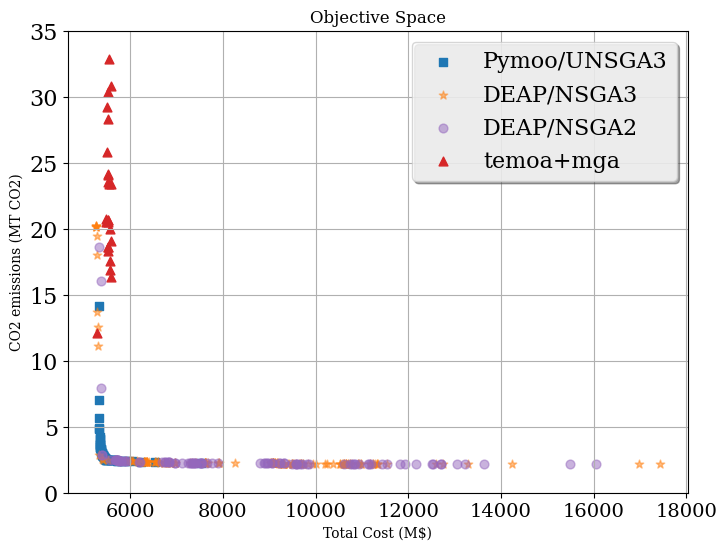

In [23]:
plt.figure(figsize=(8, 6), facecolor='w')
plt.scatter(pf_usnga3[:, 0], pf_usnga3[:, 1], s=40, facecolors='tab:blue', label='Pymoo/UNSGA3', marker='s')
plt.scatter(pf_nsga3[:, 0], pf_nsga3[:, 1], s=40, facecolors='tab:orange', label='DEAP/NSGA3', marker='*', alpha=0.5)
plt.scatter(pf_nsga2[:, 0], pf_nsga2[:, 1], s=40, facecolors='tab:purple', label='DEAP/NSGA2', alpha=0.5)
plt.scatter(pf_temoa_remap[:, 0], pf_temoa_remap[:, 1], marker='^',
            s=40, facecolors='tab:red', edgecolors='tab:red', label='temoa+mga')

plt.title("Objective Space")
# temoa_min = pf_temoa_remap[:,0].min()
plt.ylim(0,35)
# plt.xscale('log')
# plt.yscale('log')
plt.grid()
plt.grid(which='minor')

# plt.axvspan(xmin=temoa_min, xmax=temoa_min*1.1, alpha=0.2, hatch='/')
plt.xlabel("Total Cost (M$)")
plt.ylabel("CO2 emissions (MT CO2)")
plt.legend()
plt.show()

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import gaussian_kde

fig, axScatter = plt.subplots(figsize=(8,6), facecolor='lightgray')
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad=0., sharex=axScatter)
axHisty = divider.append_axes("right", 1.2, pad=0., sharey=axScatter)

# algs_list = [pf_usnga3, pf_nsga3, pf_nsga2, pf_temoa_remap]
algs_list = [pf_usnga3, pf_nsga3, pf_nsga2]
markers = ['s', '*', 'o', '^']
colors = ['tab:blue', 'tab:orange', 'tab:purple', 'tab:red']
labels = ['Pymoo/UNSGA3', 'DEAP/NSGA3', 'DEAP/NSGA2', 'Temoa+MGA']
for i,data in enumerate(algs_list):
    x = data[:,0]
    y = data[:,1]
    
    density_x = gaussian_kde(x)
    density_y = gaussian_kde(y)

    axScatter.scatter(x, y, s=30, facecolors=colors[i], label=labels[i], marker=markers[i])
    linex = density_x(np.sort(x))
    liney = density_y(np.sort(y))
    axHistx.plot(np.sort(x), linex, color=colors[i])
    axHistx.fill_between(np.sort(x), 0, linex,alpha=0.3, color=colors[i])
    
    axHisty.plot(liney,np.sort(y), color=colors[i])
    axHisty.fill_between(liney, np.sort(y), np.min(pf_nsga3[:,1]), alpha=0.3, color=colors[i])
        
plt.setp(axHistx.get_xticklabels() + axHisty.get_yticklabels(),
         visible=False)

plt.setp(axHistx.get_yticklabels() + axHisty.get_xticklabels(),
         visible=False)


axScatter.set_ylim(0,22)
axScatter.set_xlim(5e3,17.5e3)
axHisty.tick_params(axis='x', labelrotation=-90)
axScatter.grid(alpha=0.2, which='major')
axScatter.grid(alpha=0.05, which='minor')
axScatter.legend(shadow=True, fontsize=16)

axScatter.set_xlabel("Total Cost [M\$]", fontsize=18)
axScatter.set_ylabel("Emissions [MT CO2eq]", fontsize=18)
axHistx.grid(alpha=0.2)
axHisty.grid(alpha=0.2)
# axScatter.set_xscale('log')
plt.tight_layout()
plt.savefig("../docs/figures/results/algorithm_comparison_kde.pgf")
plt.show()

/var/folders/6h/g412p7x53jbcqr_x5sy9z8th0000gn/T/ipykernel_69484/2797149477.py:53: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()
